***
**Author:** Josiah Wallis \
Created for use in CS/STAT108: Data Science Ethics (UCR - Winter 2024)
***

# Intro to Statistical Models
A **statistical model** is a mathematical model that utilizes statistical assumptions to describe a relationship between random variables. For our purposes, a random variable is a feature or column in our datasets. They are assumed to be probabilistic in nature. \
\
These models are commonly used for **prediction** — given past data and their associated labels, can we predict labels for unseen data? **Regression** involves predicting a **quantitative or continuous label** like money or temperature. **Classification** involves predicting predicting a **qualitative, categorical, or discrete label** like color or animal. In this notebook, we'll look at **simple linear regression**.

***
# Linear Regression
**Linear regression** is a linear prediction model that fits a line to data by minimizing its predictive error on the data. In other words, it attempts to model a relationship between one or more independent variables, or features, and a **quantitative** dependent variable, or target feature, using a line that has the least predictive error out of all possible linear regression models. The model can predict a label for said datapoint.

## Simple Linear Regression
Assume a dataset has a trend that can be modeled by a line. **Simple linear regression** is a statistical model of the form
$$y = \theta_1x + \theta_0 + \varepsilon$$
where


*   $y$ = target feature
*   $\theta_i$ = parameters that define the model
*   $\varepsilon$ = random error

$\theta_0$ is often called the intercept or bias of the model. $\varepsilon$ is the unexplainable error encountered in real-world problems, e.g. human error in recording the data, error in data recording software/hardware, etc. \

The goal in simple linear regression is to find an estimate $\hat{y}$ of the true data trend $y$ that approximates the relationship between between our independent and dependent variables. More specifically, we want to find
$$\hat{y} = \hat{\theta_1}x + \hat{\theta_0}$$
where $\hat{\theta_i}$ are our estimated model parameters. Though we won't delve into the entire process of finding these parameters, we'll see how to do it in practice below.\
\
I strongly encourage you have a browser pulled up while working through this notebook if you are unfamiliar with some of the concepts! I'll very often search "plt.scatter" or "np.where" to make sure I understand the function and what arguments they take. If you're curious what something is or how it truly works, google!



In [1]:
# Import libraries and dataset loader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

'''
Load the dataframe.
sklearn, a standard machine learning library, has many dataset loading functions for example datasets.
'''
bunch = fetch_california_housing(as_frame = True)
df = bunch['frame']

The `sklearn` `bunch` object is a dictionary-type object that contains all information relevant to the dataset it contains. Every `bunch` has a "DESCR" keyword that tells us about our dataset.

In [2]:
print(bunch['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Exploratory Data Analysis

1) Let's take a look at our dataset! Output the first 10 samples in the dataset.

In [3]:
# Enter code below
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


2) The **correlation coefficient** $\rho$ is the measure of the linear relationship between two features $x$ and $y$ that ranges from -1 to 1 inclusively. The closer its absolute value is to 1, the stronger the linear relationship is between two features is. The sign of the coefficient determines the direction of their relationship. \


*   If $\rho$ is **positive**, there is a **positive** linear trend between $x$ and $y$. An **increase** in $x$ *may* suggest an **increase** in $y$ linearly.
*   If $\rho$ is **negative**, there is a **negative** linear trend between $x$ and $y$. An **increase** in $x$ *may* suggest a **decrease** in $y$ linearly.
*   A change in $x$ does *not* imply a change in $y$. Correlation suggests there may be a linear relationship between two variables, not a causal relationship.

Check the correlation between each feature in our dataset using the `corr` method from `pandas`. What do these values tell you about the relationship between our features and our target feature: median house value? Do any features stand out?



In [4]:
# Enter code below
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


3) Grab the first 1000 points of the column with the highest correlation with median house value and store them in `X`. Store the first 1000 points of median house value in `y`. This pair will be the data we fit our simple linear regression model to.

In [5]:
# Enter code below
X = df['MedInc'][:1000].copy()
y = df['MedHouseVal'][:1000].copy()

4) Visualization time! Use `plt.scatter` to plot your data on a scatter plot. Add some labels and other configurations that to make this plot look nice. Do you think there's a linear relationship between MedInc and MedHouseVal? \
*Hint*: the keyword arguments *alpha* and *s* may be useful for point visibility.

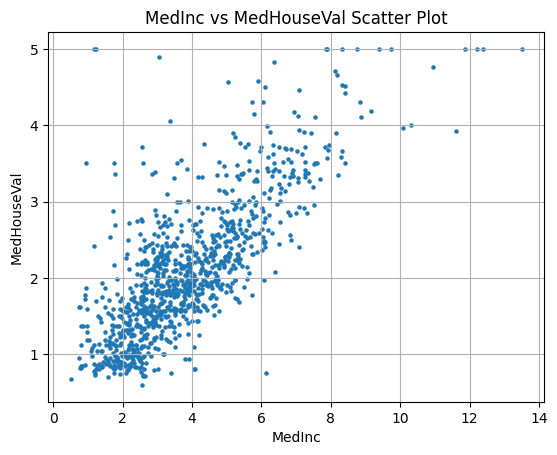

In [6]:
# Enter code below
plt.scatter(X, y, s = 5)
plt.title('MedInc vs MedHouseVal Scatter Plot')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.grid()
plt.show()

5) **(OPTIONAL)** Experiment with different visualization graphs and plots! Feel free to import `seaborn` as well.

In [7]:
# Enter code below


### Fitting our model

Let's format our data before fitting a model to it. First, run this cell to turn our data into numpy arrays with the proper shape that our future linear regression class will accept.

In [8]:
X = X.to_numpy().reshape(len(X), 1)
y = y.to_numpy()

6) Because we don't have "unseen" data, we can simulate unseen data by only having our model fit on a portion of our data while testing its predictive power on the rest of the data. This is called a **train-test split** where our **training data** is the data the model fits while the **test data** is the data we use to evaluate our model's performance on unseen data. We'll use `sklearn.model_selection.train_test_split` to do this for us ([link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Import the method and make a train-test split with a test size of 20%. Verify that the training set and test set are the correct shapes.

In [9]:
# Enter code below
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

Let's import a linear regression model from a machine learning library: `sklearn`! Check out the object we're working with [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). It will produce a line that best models the relationship between MedInc and MedHouseVal. This model will have the least sum of squared errors between these two variables. \
\
In the cell below, we'll import then fit our model to our training data.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

That's it! The `fit` method did all the heavy lifting for us without us having to do any computations or the complicated code behind linear regression. If you're interested, a brief intro can be found [here](https://brilliant.org/wiki/linear-regression/)! Let's check out what estimates this model found for our $\hat{\theta_1}$ and $\hat{\theta_0}$.

In [11]:
theta_1_hat = model.coef_[0]
theta_0_hat = model.intercept_
print(f'Slope: {theta_1_hat}\nbias/intercept: {theta_0_hat}')

Slope: 0.3801630967502068
bias/intercept: 0.6294083511107362


We can plot our line and data on the same figure to see how well the line fits our data.

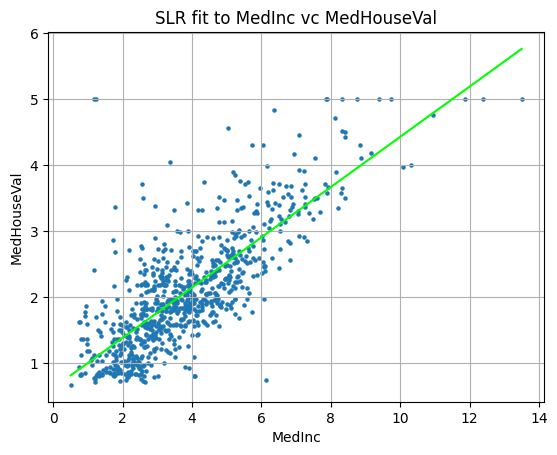

In [12]:
interval = np.linspace(np.min(X_train), np.max(X_train), 20)

plt.scatter(X_train, y_train, s = 5)
plt.plot(interval, theta_1_hat * interval + theta_0_hat, color = 'lime')
plt.title('SLR fit to MedInc vc MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.grid()
plt.show()

This seems like a pretty good fit! Though there may be other nonlinear or clustering models that can describe the data better, this is the best linear regression fit to our data when using squared error as our metric.\
\
Our estimated model is
$$\hat{y} = 0.38x + 0.63.$$
This can be interpreted as "*for a unit increase in median income, median house value increases by $38,000 on average*."

7) Before we use this model to predict values for our test data, let's plot this line on our test data. Does the line fit the test data well? \
*Hint*: `interval` is still usable from the last cell.

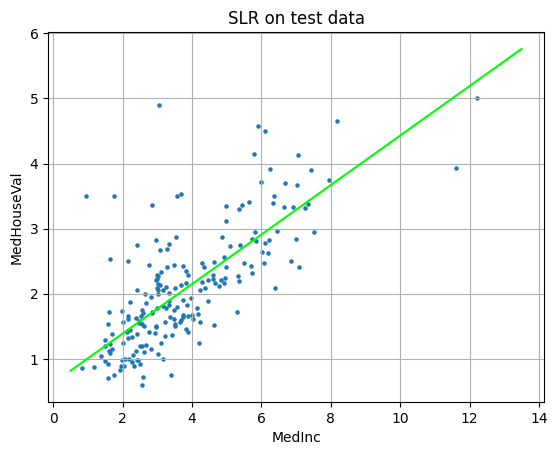

In [13]:
# Enter code below
plt.scatter(X_test, y_test, s = 5)
plt.plot(interval, theta_1_hat * interval + theta_0_hat, color = 'lime')
plt.title('SLR on test data')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.grid()
plt.show()

Prediction time! Let's predict on our test data. In this simulation, we luckily we know the true label for each data point in our test data. Therefore, we have an idea of how good the predictions are.

In [14]:
y_hat = model.predict(X_test)
n = 5

# Comparing our predicted vs actual values
print(f'Predicted values: {y_hat[:n]}\nActual values: {y_test[:n]}')

Predicted values: [1.75970927 2.87039377 1.23766931 1.87273176 2.69924435]
Actual values: [2.821 4.578 1.125 2.418 3.367]


8) Awesome! We've done our first predictions. Do these seem like good estimates? What factors could explain the discrepancy in our estimates versus the true values?

9) There are many performance metrics for measuring how well a model is predicting. One of these metrics is **mean-squared error**, the average of the sum of squared errors. It is a common metric used in regression problems and is computed as

$$MSE = \frac1n \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2.$$


*   $n$ i the number of data points being used
*   $y_i$ is the true label of $x_i$
*   $\hat{y}_i$ is the predicted label of $x_i$

You can use the $MSE$ of two models to get an idea of how good one model is over the other for a specific prediction case. Typically, a lower MSE signals that model may have a greater predictive power than another. For more details, click [here](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/).\
\
Write a function `mse` that takes as arguments the true and predicted labels of a dataset and computes their mean-squared error. Then, compute the Test MSE - the MSE between the test data labels and their predicted labels. Compare to `sklearn.metrics.mean_squared_error`.

In [15]:
# Enter code below
from sklearn.metrics import mean_squared_error

def mse(y, y_hat):
  n = len(y)
  eps = (y - y_hat) ** 2
  total = eps.sum()
  return (1 / n) * total

mse(y_test, y_hat) == mean_squared_error(y_test, y_hat)

True

# Conclusion
**Congratz on finishing the notebook!** You now know how to


*   load data from `sklearn`
*   plot a scatter plot with `plt`
*   perform a train-test split using `sklearn`
*   fit a simple linear regression model using `sklean`
*   find the parameters of your model
*   plot your regression line
*   interpret model parameters
*   predict using simple linear regression

Every model has different pros and cons: some predict better on more complicated data, some generalize better, some we can hardly interpret! Additionally, there are tools for judging performance that are specific to regression models that do not work well with models trained for classification (like MSE), and vice versa. At the end of the day, all predictive models used for regression take in data to learn from, then they can be used to predict continuous labels for unseen data. \
\
Next week, we'll talk about **logistic regression.** Though it's called "regression," it is used for the classification task. It learns from data, then it is used to predict categorical or discrete labels from 2 class. An example is learning from images of numbers, then determining if an image is a 5 or not.